In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!cp /content/drive/MyDrive/Dataset2.csv /content/

# Step 1: Load and Inspect the Dataset

In [14]:
import pandas as pd
# Load the dataset into a DataFrame
df = pd.read_csv("/content/Dataset2.csv")

# Inspect the first few rows
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Handle missing values if necessary (e.g., fill with mean or drop rows)
df = df.dropna()  # Example: Drop rows with missing values

# Confirm no missing values remain
print("Missing values after handling:\n", df.isnull().sum())


        x1       x2       x3       x4      x5  x6  x7  x8  x9       x10  ...  \
0  28509.7  27161.2  29969.5  27119.7  119180   1  -1   0   1  1.000000  ...   
1  27161.2  26852.8  27286.9  26812.6   21950   1   1   0   2  0.666667  ...   
2  26852.8  26863.5  26975.7  26805.1   13560  -1   1   1   0  0.333333  ...   
3  26863.5  26761.1  27114.8  26682.9   33660   1   1   0   1  0.333333  ...   
4  26761.1  26878.2  26942.8  26565.3   32750  -1  -1   1   0  0.666667  ...   

   x20  x21  x22  x23  x24       x25  x26       x27       x28  output  
0   -1    1    1    0    1  0.714286  0.6  0.333333  0.714286       1  
1   -1    1    0    0    1  0.714286  0.6  0.666667  0.714286       0  
2   -1    0    0    1    0  0.571429  0.4  0.666667  0.642857       1  
3   -1    0    1    1    1  0.571429  0.6  0.666667  0.714286       0  
4   -1    1    1    0    0  0.428571  0.6  0.333333  0.714286       0  

[5 rows x 29 columns]
Missing values:
 x1        0
x2        0
x3        0
x4        0

# Step 2: Evaluate the Distribution of **Data**

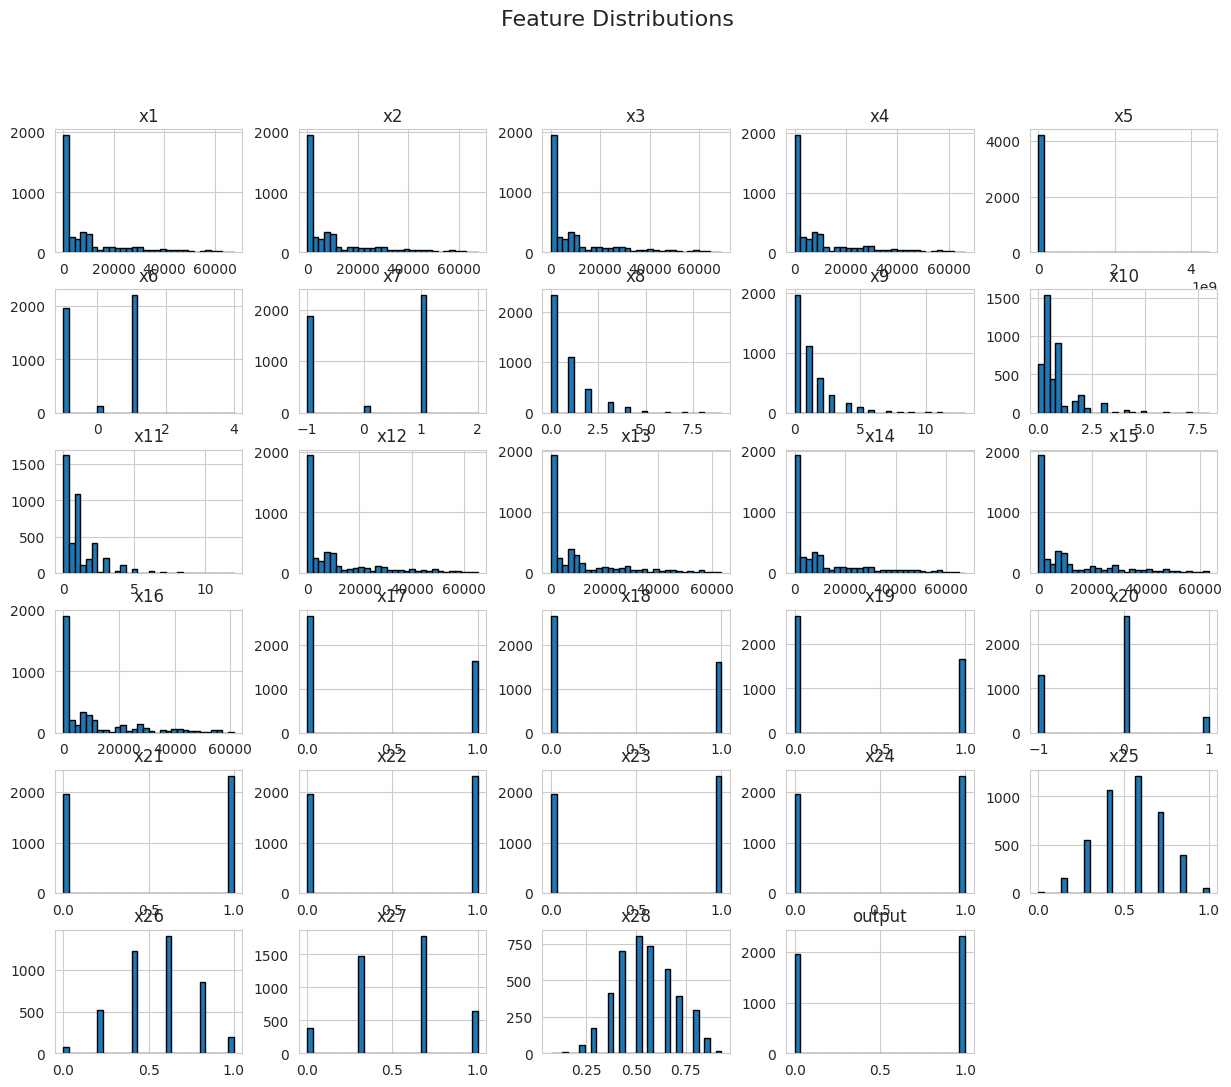

         count          mean           std         min           25%  \
x1      4281.0  1.092400e+04  1.517724e+04    4.200000    376.300000   
x2      4281.0  1.091742e+04  1.517590e+04    4.200000    376.300000   
x3      4281.0  1.119254e+04  1.556106e+04    4.400000    384.700000   
x4      4281.0  1.061436e+04  1.474164e+04    3.900000    365.500000   
x5      4281.0  1.442856e+07  1.672892e+08  260.000000  38730.000000   
x6      4281.0  5.793039e-02  9.863121e-01   -1.000000     -1.000000   
x7      4281.0  9.507125e-02  9.821189e-01   -1.000000     -1.000000   
x8      4281.0  8.147629e-01  1.187169e+00    0.000000      0.000000   
x9      4281.0  1.159542e+00  1.585126e+00    0.000000      0.000000   
x10     4281.0  8.151522e-01  8.892971e-01    0.000000      0.333333   
x11     4281.0  1.159153e+00  1.269133e+00    0.000000      0.333333   
x12     4281.0  1.091664e+04  1.509986e+04    4.550000    378.550000   
x13     4281.0  1.100801e+04  1.506480e+04    4.550000    394.50

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set up the plotting style
sns.set_style("whitegrid")

# Plot histograms for each feature
df.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Calculate statistical measures
statistics = df.describe().T  # Transpose for better readability
statistics["skewness"] = df.skew()
statistics["kurtosis"] = df.kurtosis()

# Display statistical measures
print(statistics)


# Step 3: Evaluate Linearity/Non-**Linearity**

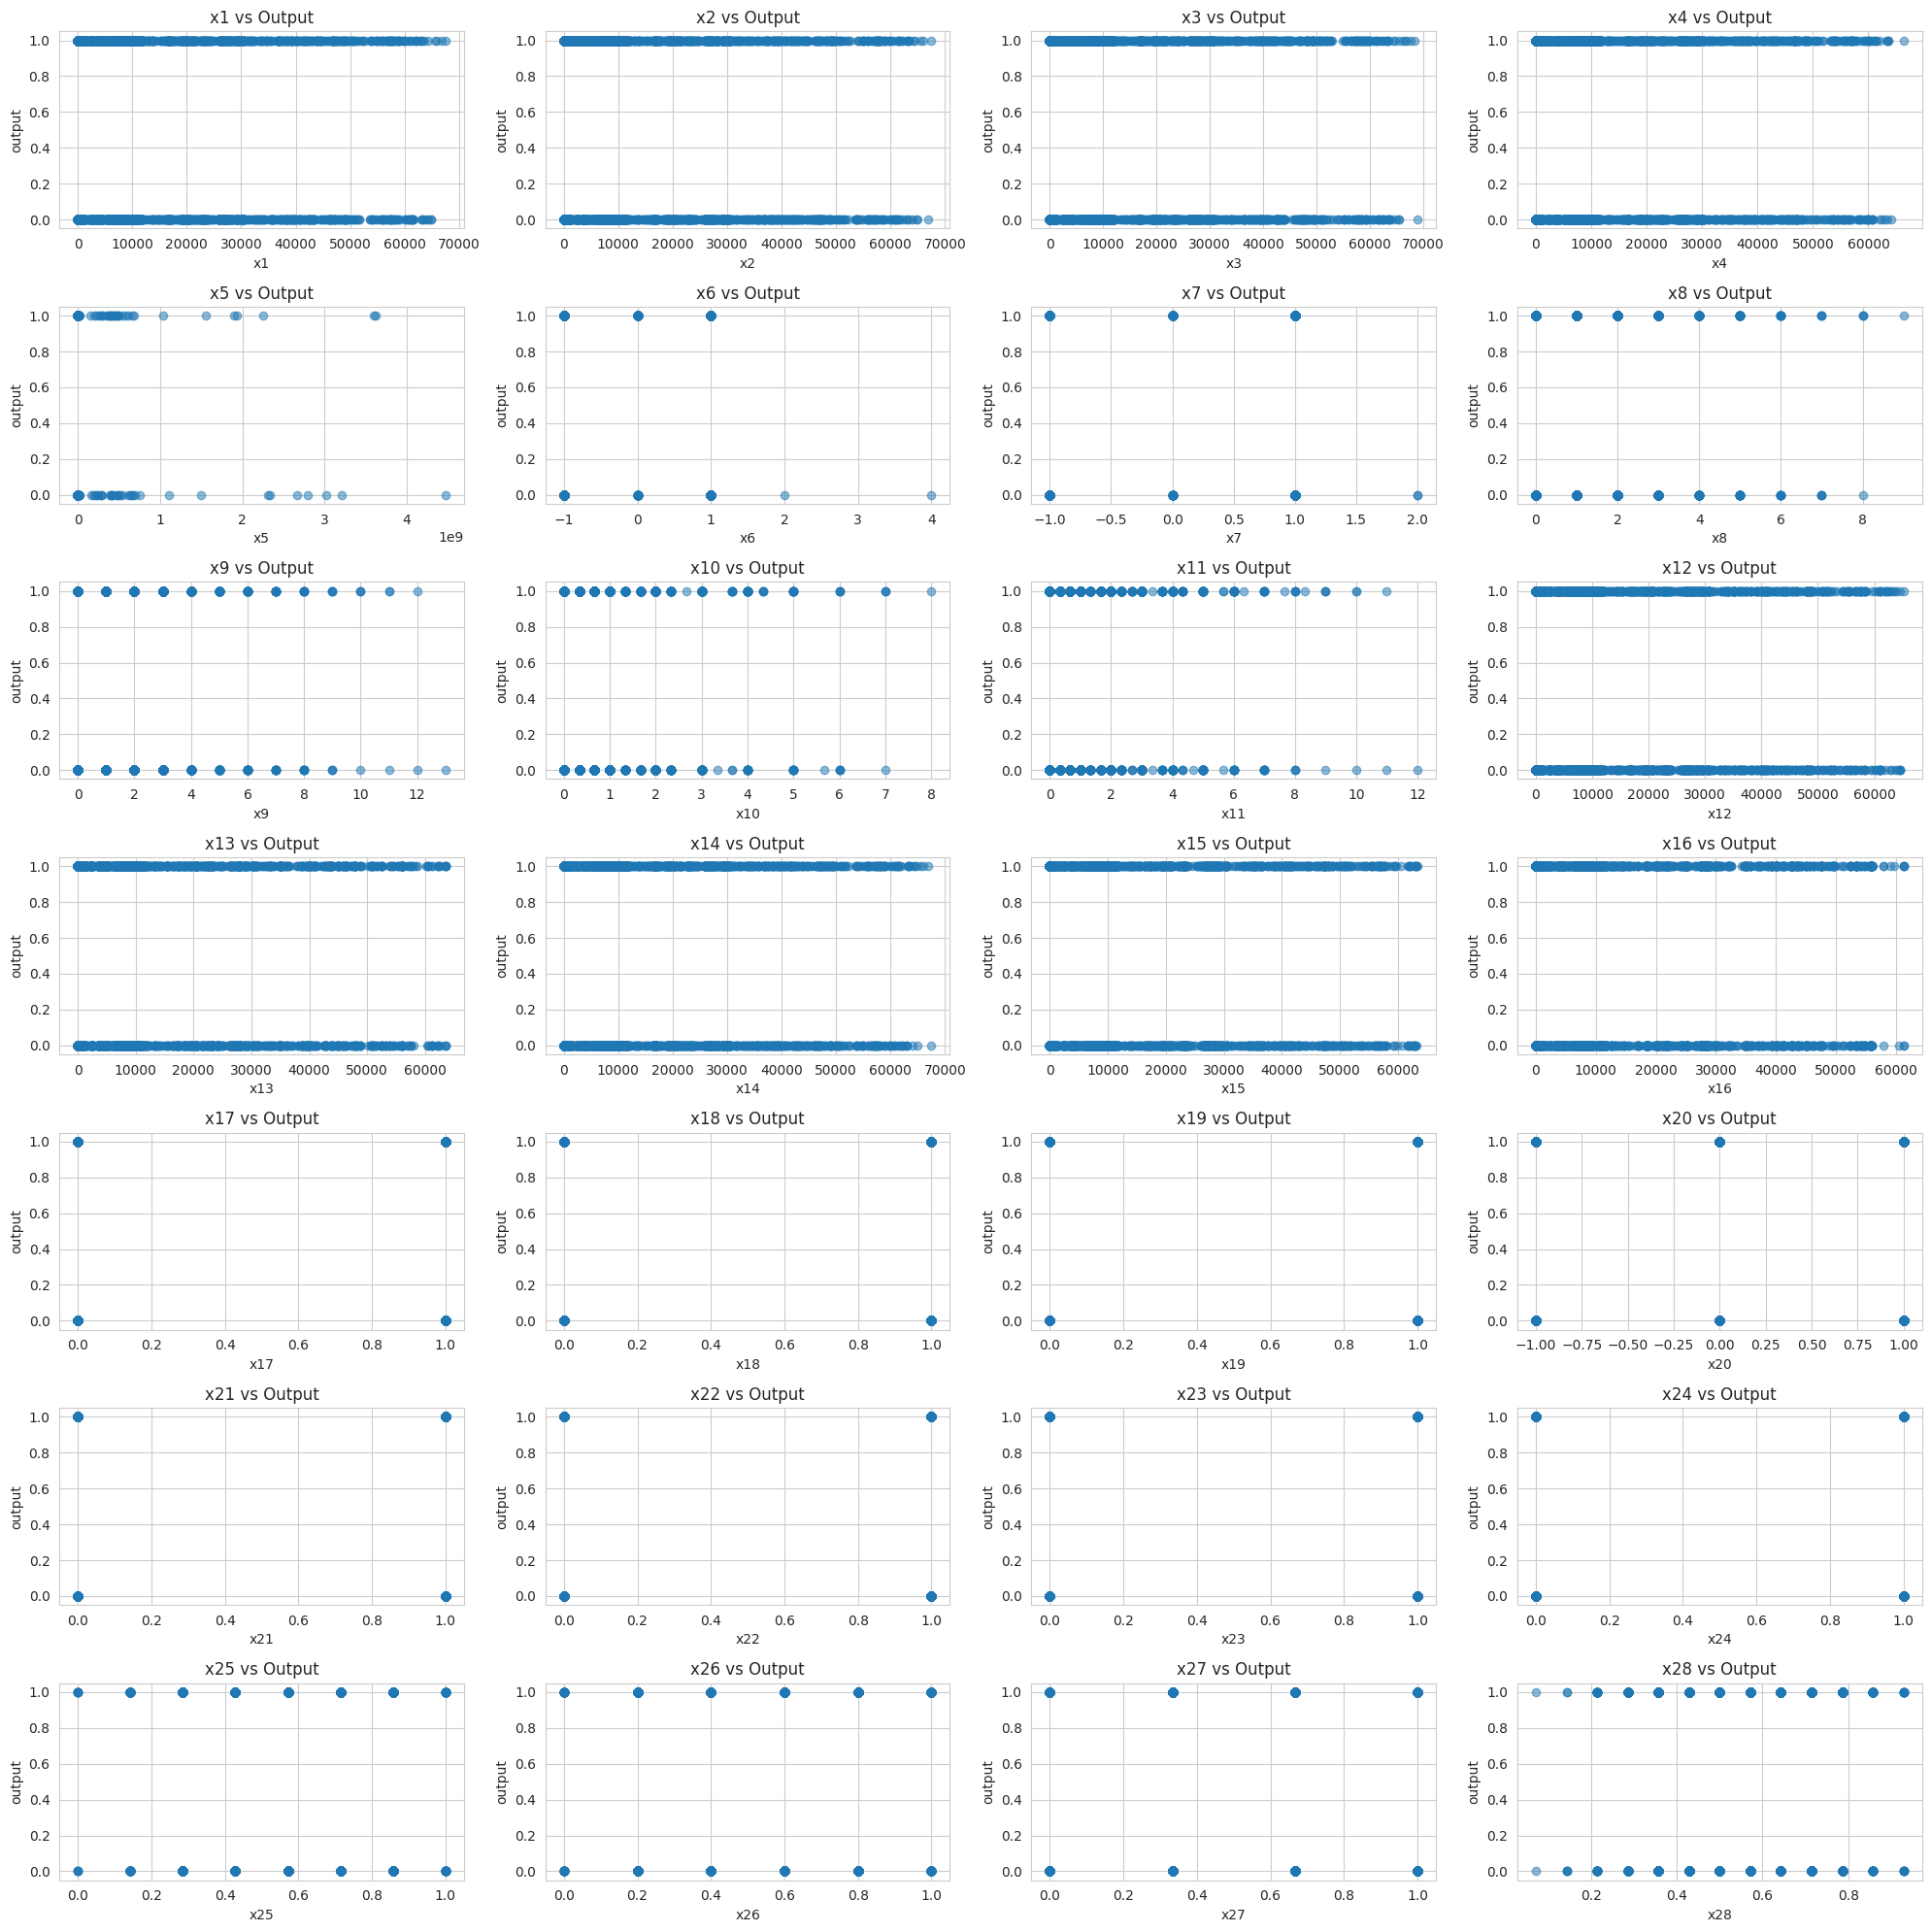

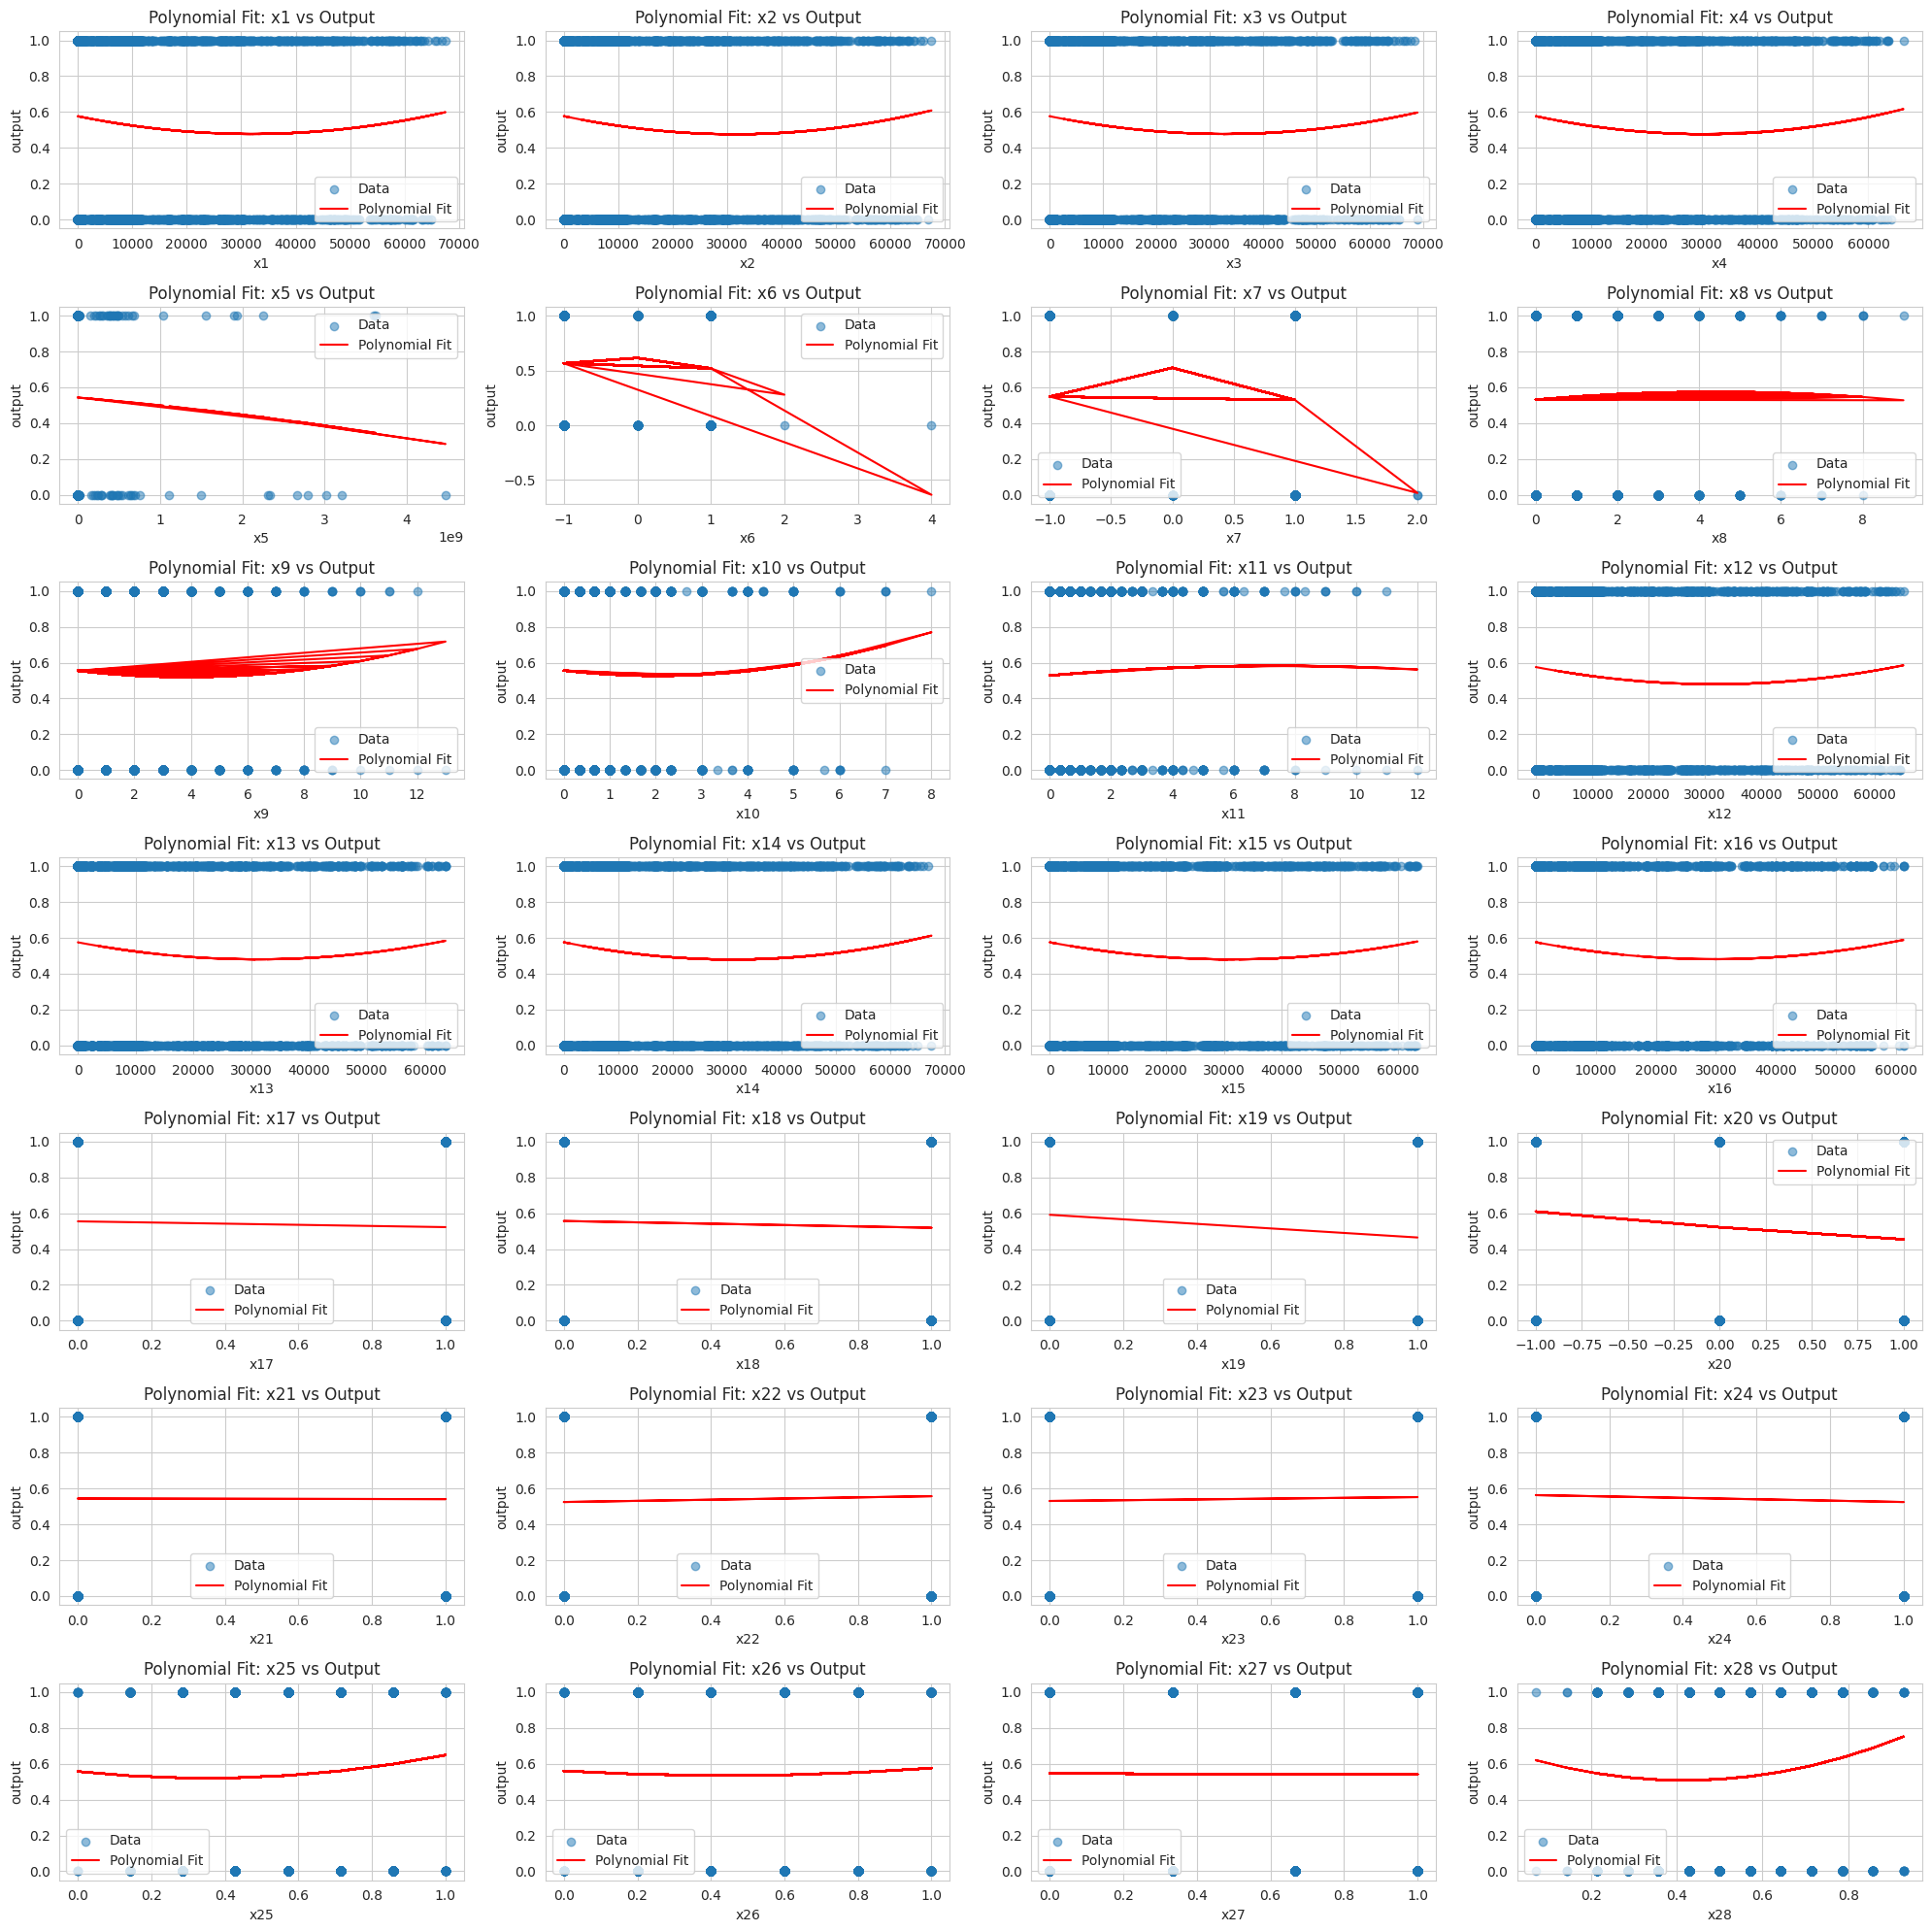

In [16]:

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Set up the plotting style
sns.set_style("whitegrid")

# Step 3.1: Scatter Plots for Each Feature vs Output
plt.figure(figsize=(20, 20))
for i, column in enumerate(df.columns[:-1]):  # Exclude 'output'
    plt.subplot(7, 4, i + 1)  # Adjust grid size if necessary
    plt.scatter(df[column], df["output"], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel("output")
    plt.title(f"{column} vs Output")
plt.tight_layout()
plt.show()

# Step 3.2: Checking for Non-Linearity Using Polynomial Regression
poly = PolynomialFeatures(degree=2)  # Change degree for higher-order fits
lin_reg = LinearRegression()

plt.figure(figsize=(20, 20))
for i, column in enumerate(df.columns[:-1]):  # Exclude 'output'
    X = df[column].values.reshape(-1, 1)
    y = df["output"].values

    # Transform to polynomial features
    X_poly = poly.fit_transform(X)
    lin_reg.fit(X_poly, y)
    y_pred = lin_reg.predict(X_poly)

    # Plot scatter and polynomial regression curve
    plt.subplot(7, 4, i + 1)
    plt.scatter(X, y, alpha=0.5, label="Data")
    plt.plot(X, y_pred, color='red', label="Polynomial Fit")
    plt.xlabel(column)
    plt.ylabel("output")
    plt.title(f"Polynomial Fit: {column} vs Output")
    plt.legend()

plt.tight_layout()
plt.show()


# Step 4: Measure **Correlation**

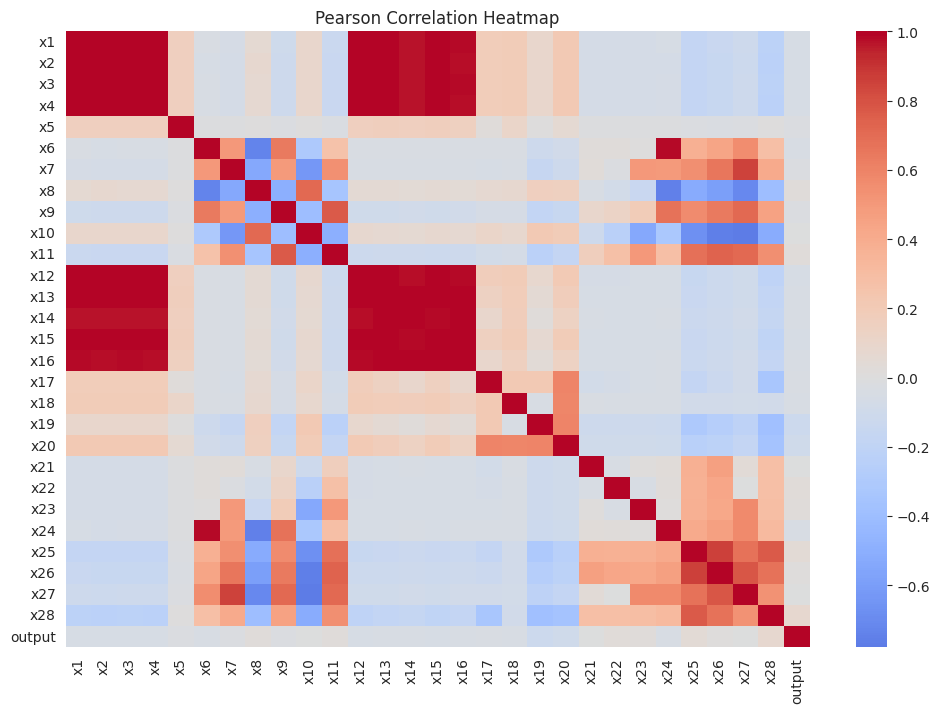

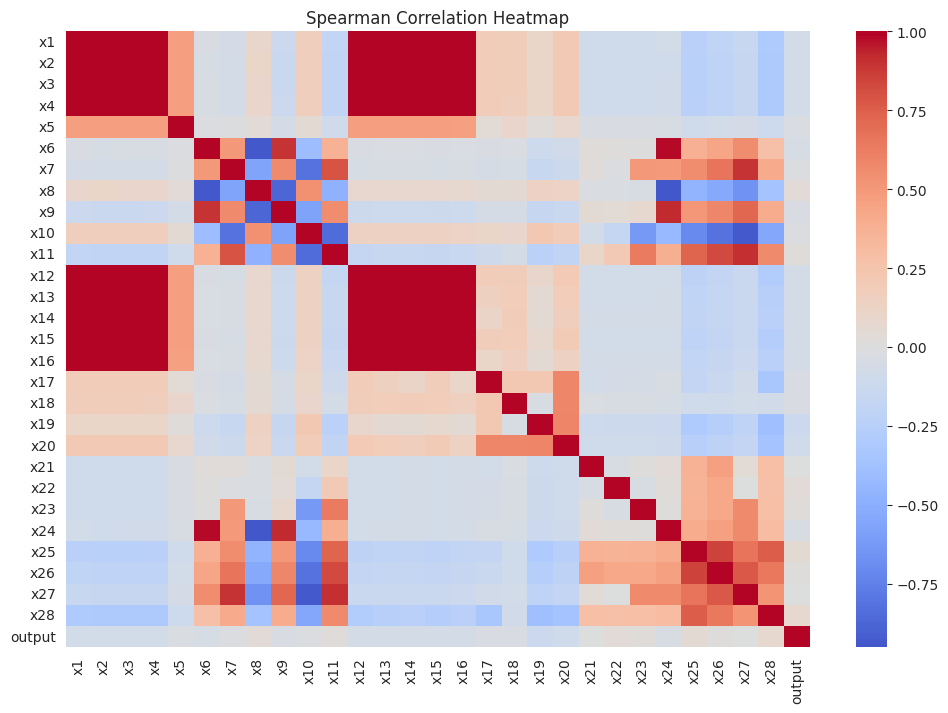

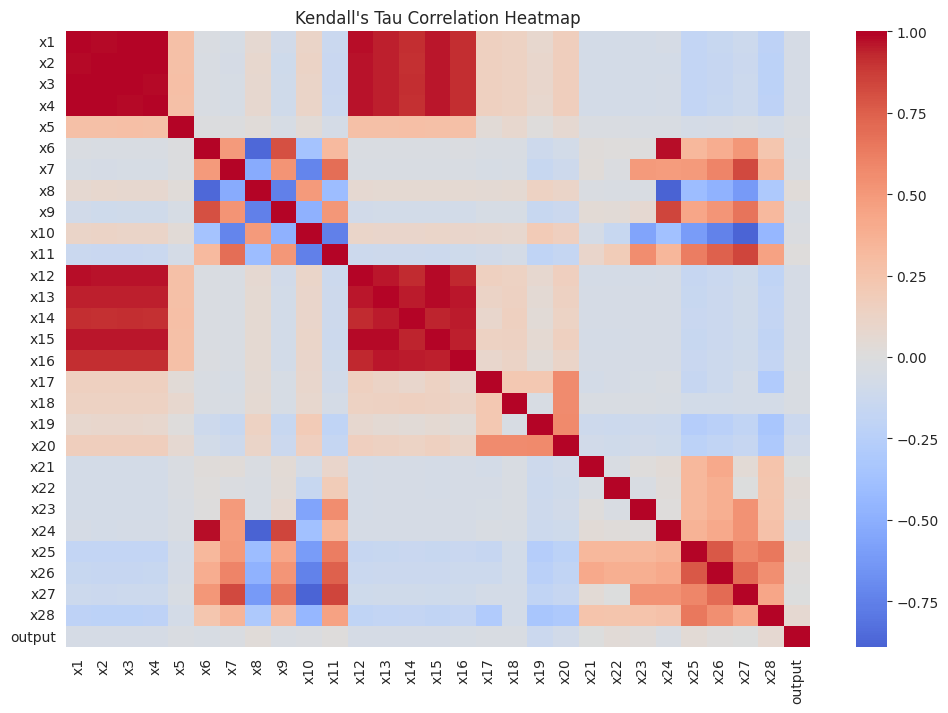

Pearson Correlation with Output:
 output    1.000000
x28       0.073621
x25       0.044360
x22       0.032521
x8        0.026117
x11       0.023196
x23       0.021737
x26       0.011360
x27      -0.002408
x21      -0.003242
x10      -0.004456
x9       -0.015222
x5       -0.017328
x7       -0.019937
x17      -0.031373
x18      -0.036731
x24      -0.038576
x14      -0.047961
x16      -0.048150
x6       -0.048263
x13      -0.049553
x15      -0.049896
x12      -0.050115
x4       -0.050299
x2       -0.050987
x3       -0.051361
x1       -0.051488
x20      -0.095176
x19      -0.123830
Name: output, dtype: float64

Spearman Correlation with Output:
 output    1.000000
x28       0.073834
x25       0.047407
x8        0.033320
x22       0.032521
x23       0.021737
x11       0.016863
x26       0.011768
x27      -0.002548
x21      -0.003242
x10      -0.015029
x7       -0.020819
x5       -0.027611
x9       -0.030727
x17      -0.031373
x18      -0.036731
x24      -0.038576
x6       -0.048264
x16     

In [17]:
# Step 4.1: Compute Pearson Correlation Coefficients
pearson_corr = df.corr(method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=False, cmap='coolwarm', center=0)
plt.title("Pearson Correlation Heatmap")
plt.show()

# Step 4.2: Compute Spearman Correlation Coefficients
spearman_corr = df.corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=False, cmap='coolwarm', center=0)
plt.title("Spearman Correlation Heatmap")
plt.show()

# Step 4.3: Compute Kendall’s Tau Correlation Coefficients
kendall_corr = df.corr(method='kendall')
plt.figure(figsize=(12, 8))
sns.heatmap(kendall_corr, annot=False, cmap='coolwarm', center=0)
plt.title("Kendall's Tau Correlation Heatmap")
plt.show()

# Display correlation values for 'output' variable
print("Pearson Correlation with Output:\n", pearson_corr["output"].sort_values(ascending=False))
print("\nSpearman Correlation with Output:\n", spearman_corr["output"].sort_values(ascending=False))
print("\nKendall's Tau Correlation with Output:\n", kendall_corr["output"].sort_values(ascending=False))


# Step 5: Visualize Correlation with **Heatmaps**

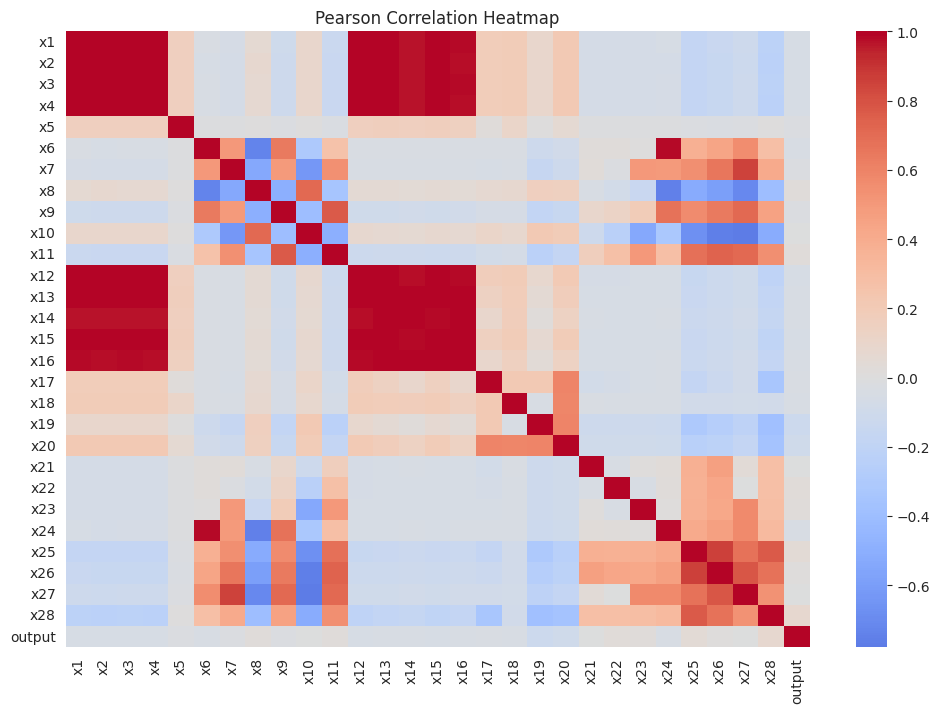

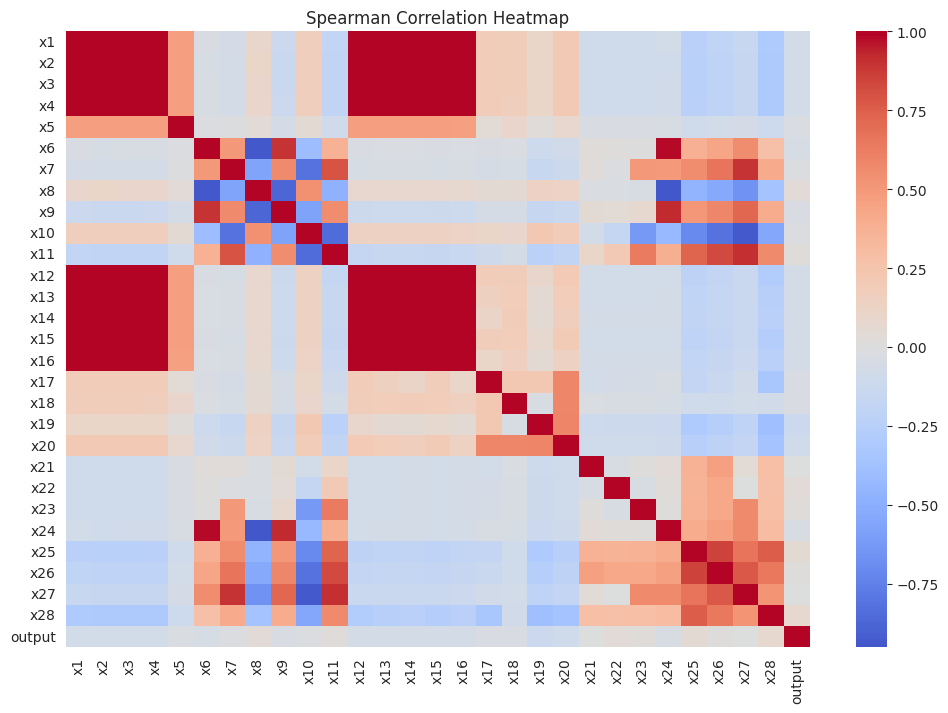

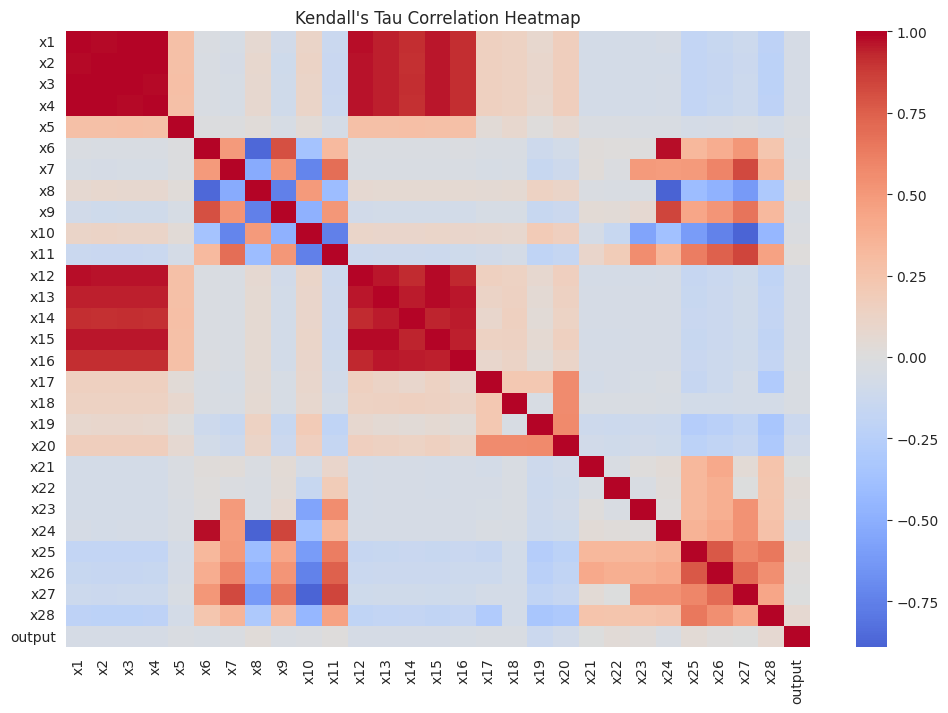

In [18]:

# Function to plot heatmaps
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
    plt.title(title)
    plt.show()

# Step 5.1: Pearson Correlation Heatmap
pearson_corr = df.corr(method='pearson')
plot_heatmap(pearson_corr, "Pearson Correlation Heatmap")

# Step 5.2: Spearman Correlation Heatmap
spearman_corr = df.corr(method='spearman')
plot_heatmap(spearman_corr, "Spearman Correlation Heatmap")

# Step 5.3: Kendall's Tau Correlation Heatmap
kendall_corr = df.corr(method='kendall')
plot_heatmap(kendall_corr, "Kendall's Tau Correlation Heatmap")


# Step 6: Perform PCA and Visualize in 2D and **3D**

Explained Variance Ratio: [0.34478064 0.24017273 0.07845555]


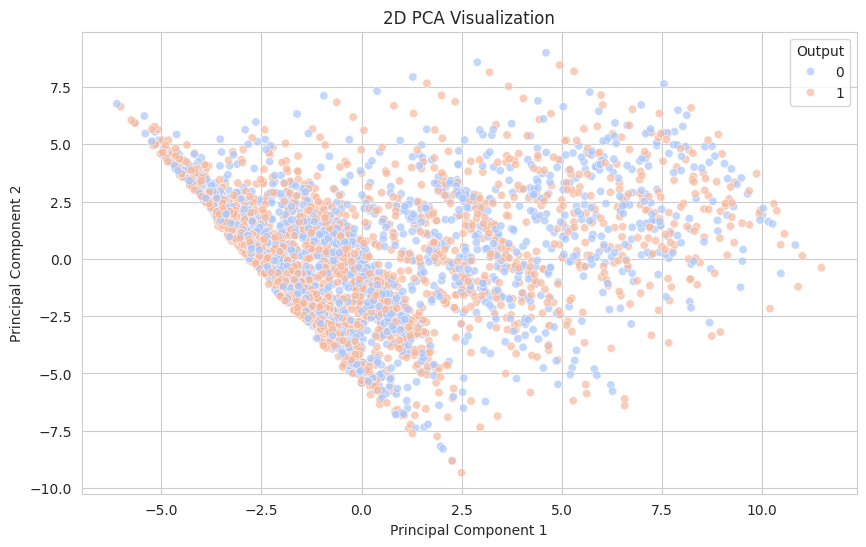

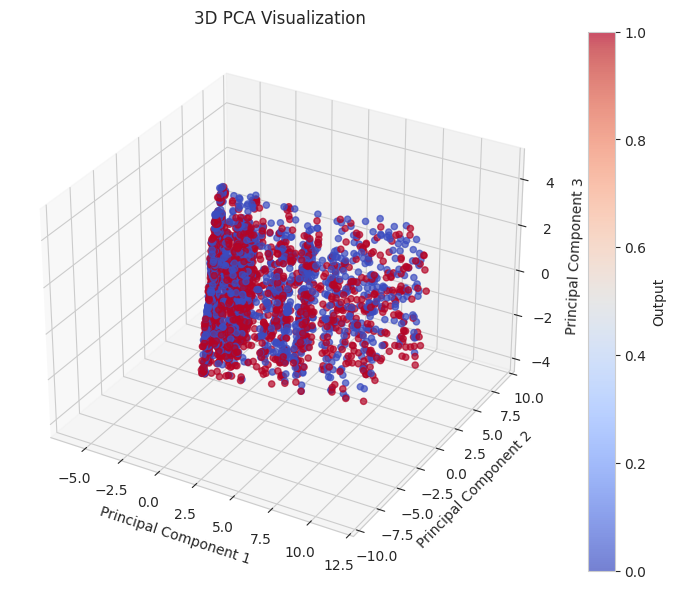

In [19]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files

# Separate features (x1 to x28) and target (output)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # The last column (output)

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)  # We extract 3 principal components
X_pca = pca.fit_transform(X_scaled)

# Step 6.1: Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Step 6.2: 2D PCA Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="coolwarm", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization")
plt.legend(title="Output")
plt.show()

# Step 6.3: 3D PCA Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap="coolwarm", alpha=0.7)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Visualization")
plt.colorbar(scatter, label="Output")
plt.show()


# Step 7: Interpret Correlation **Results**

Comparison of Pearson, Spearman, and Kendall Correlation with Output:
         Pearson  Spearman   Kendall
output  1.000000  1.000000  1.000000
x28     0.073621  0.073834  0.064142
x25     0.044360  0.047407  0.042396
x22     0.032521  0.032521  0.032521
x8      0.026117  0.033320  0.031221
x11     0.023196  0.016863  0.014846
x23     0.021737  0.021737  0.021737
x26     0.011360  0.011768  0.010689
x27    -0.002408 -0.002548 -0.002375
x21    -0.003242 -0.003242 -0.003242
x10    -0.004456 -0.015029 -0.013409
x9     -0.015222 -0.030727 -0.028207
x5     -0.017328 -0.027611 -0.022548
x7     -0.019937 -0.020819 -0.020551
x17    -0.031373 -0.031373 -0.031373
x18    -0.036731 -0.036731 -0.036731
x24    -0.038576 -0.038576 -0.038576
x14    -0.047961 -0.072805 -0.059457
x16    -0.048150 -0.068204 -0.055750
x6     -0.048263 -0.048264 -0.047639
x13    -0.049553 -0.071473 -0.058397
x15    -0.049896 -0.072895 -0.059533
x12    -0.050115 -0.074601 -0.060930
x4     -0.050299 -0.076438 -0.062423
x2   

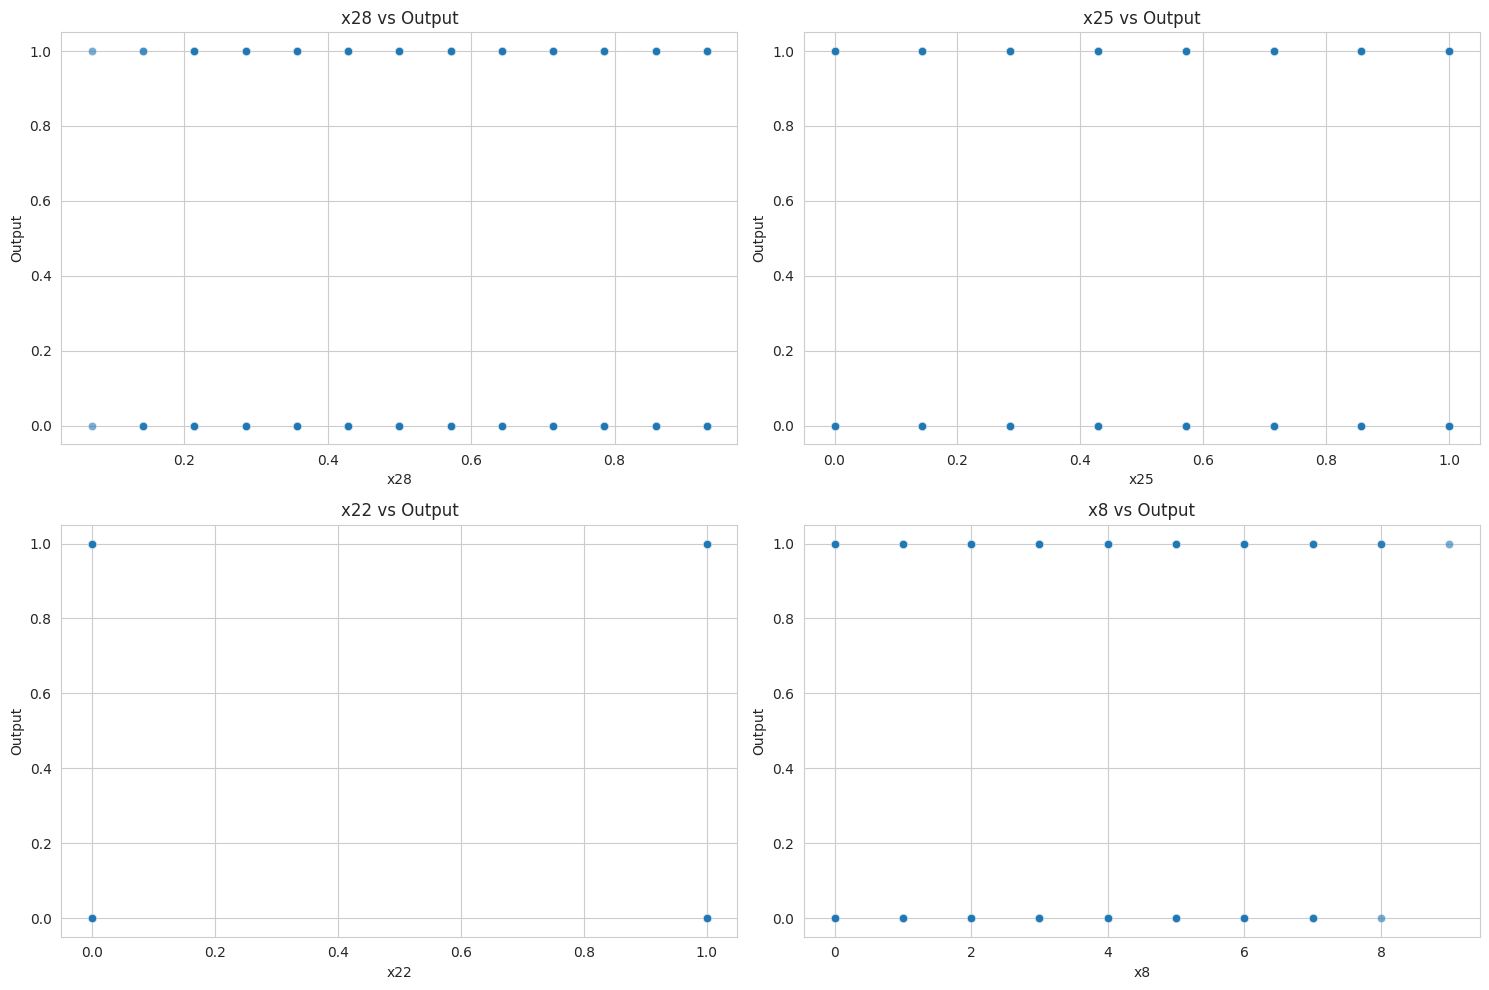

In [20]:



# Compute correlation coefficients
pearson_corr = df.corr(method='pearson')["output"]
spearman_corr = df.corr(method='spearman')["output"]
kendall_corr = df.corr(method='kendall')["output"]

# Combine results into a DataFrame for easy comparison
correlation_df = pd.DataFrame({
    "Pearson": pearson_corr,
    "Spearman": spearman_corr,
    "Kendall": kendall_corr
}).sort_values(by="Pearson", ascending=False)

# Display the correlation results
print("Comparison of Pearson, Spearman, and Kendall Correlation with Output:")
print(correlation_df)

# Step 7.1: Compare Pearson and Spearman
linear_features = correlation_df[(correlation_df["Pearson"].abs() >= 0.5) &
                                 (correlation_df["Pearson"].abs() - correlation_df["Spearman"].abs() < 0.1)]
non_linear_features = correlation_df[(correlation_df["Pearson"].abs() < 0.5) &
                                     (correlation_df["Spearman"].abs() >= 0.5)]
no_relationship = correlation_df[(correlation_df["Pearson"].abs() < 0.2) &
                                 (correlation_df["Spearman"].abs() < 0.2)]

print("\nLikely Linear Relationships (Pearson ≈ Spearman):")
print(linear_features)

print("\nLikely Non-Linear Relationships (Pearson << Spearman):")
print(non_linear_features)

print("\nNo Relationship (Pearson ≈ 0 and Spearman ≈ 0):")
print(no_relationship)

# Step 7.2: Compare Spearman and Kendall
consistent_monotonic = correlation_df[(correlation_df["Spearman"].abs() - correlation_df["Kendall"].abs() < 0.1)]
outlier_affected = correlation_df[(correlation_df["Spearman"].abs() > correlation_df["Kendall"].abs() + 0.1)]

print("\nConsistent Monotonic Relationships (Spearman ≈ Kendall):")
print(consistent_monotonic)

print("\nPotential Outlier-Affected Relationships (Spearman >> Kendall):")
print(outlier_affected)

# Step 7.3: Visualize relationships with scatter plots
plt.figure(figsize=(15, 10))
top_features = correlation_df.index[1:5]  # Select the top correlated features (excluding 'output')
for i, feature in enumerate(top_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=df[feature], y=df["output"], alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel("Output")
    plt.title(f"{feature} vs Output")

plt.tight_layout()
plt.show()


# Step 8: Summarize **Findings**



1. **Distribution:**
   - Histograms were plotted for each feature.
   - Statistical measures such as skewness and kurtosis were computed.
   - The dataset likely has skewed features based on the skewness values.

2. **Linearity/Non-Linearity:**
   - Scatter plots were generated for each feature against the output.
   - Polynomial regression was used to detect non-linear relationships.
   - Some features might exhibit non-linearity if the polynomial regression curve deviates significantly from a straight line.

3. **Correlation:**
   - Pearson, Spearman, and Kendall correlation matrices were computed.
   - Heatmaps were generated to visualize correlations.
   - Correlation values with the output variable were printed to identify strong relationships.

4. **PCA Visualization:**
   - Features were standardized before applying PCA.
   - A 2D PCA scatter plot showed potential clusters.
   - A 3D PCA plot further visualized patterns in higher dimensions.
   - Explained variance ratio indicated how much information each principal component retained.

Would you like me to extract specific details, such as the strongest correlated features or PCA explained variance values?